## MNIST CNN

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

### Data

Untar the data for the MNIST dataset; save the path to `path`.

In [3]:
path = untar_data(URLs.MNIST)

Show the contents of the `path` directory.

In [4]:
path.ls()

[PosixPath('/home/paperspace/.fastai/data/mnist_png/testing'),
 PosixPath('/home/paperspace/.fastai/data/mnist_png/training'),
 PosixPath('/home/paperspace/.fastai/data/mnist_png/models')]

Create an `ImageList` from the folder `path`. Set `convert_mode` to `L`. Save it to variable `il`. What does this do?

In [5]:
il = ImageList.from_folder(path, convert_mode='L')

In [6]:
il.convert_mode

'L'

In [ ]:
??

Show the first element in the `items` attribute in `il`.

In [8]:
il.items[0]

PosixPath('/home/paperspace/.fastai/data/mnist_png/testing/6/4239.png')

In [9]:
type(il)

fastai.vision.data.ImageList

Set `defaults.cmap` to `'binary'`. What does this do?

In [15]:
# This sets the default color map. In this case, we're setting it up to show greyscale images.
defaults.cmap = 'binary'

In [ ]:
??

In [14]:
type(defaults)

types.SimpleNamespace

In [13]:
doc(ImageList)

Take a look at `il`.

In [16]:
il

ImageList (70000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/paperspace/.fastai/data/mnist_png

Show the image in the first element of `il`. What's the difference in `il[0]` and `il.items[0]`?

In [17]:
il[0]

In [18]:
il.items[0]

PosixPath('/home/paperspace/.fastai/data/mnist_png/testing/6/4239.png')

In [19]:
# il[0] converts the image into an actual image, while il.items[0] gives us the path to the image.

Split the imagelist by folder with training folder `training` and validation folder `testing`. Save to variable `sd`. 

In [20]:
sd = il.split_by_folder(train='training', valid='testing')

Show `sd`.

In [21]:
sd

ItemLists;

Train: ImageList (60000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/paperspace/.fastai/data/mnist_png;

Valid: ImageList (10000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/paperspace/.fastai/data/mnist_png;

Test: None

Show the contents of `path/'training'`.

In [23]:
(path/'training').ls()

[PosixPath('/home/paperspace/.fastai/data/mnist_png/training/6'),
 PosixPath('/home/paperspace/.fastai/data/mnist_png/training/4'),
 PosixPath('/home/paperspace/.fastai/data/mnist_png/training/0'),
 PosixPath('/home/paperspace/.fastai/data/mnist_png/training/2'),
 PosixPath('/home/paperspace/.fastai/data/mnist_png/training/3'),
 PosixPath('/home/paperspace/.fastai/data/mnist_png/training/5'),
 PosixPath('/home/paperspace/.fastai/data/mnist_png/training/7'),
 PosixPath('/home/paperspace/.fastai/data/mnist_png/training/1'),
 PosixPath('/home/paperspace/.fastai/data/mnist_png/training/8'),
 PosixPath('/home/paperspace/.fastai/data/mnist_png/training/9')]

Label the examples from the folder they're in, and save the resulting `LabelLists` to `ll`. How do we call `label_from_folder` on an `ItemLists` when it's not actually a method on `ItemLists` (and `ItemLists` doesn't inherit from anything)?

In [24]:
ll = sd.label_from_folder()

In [26]:
# The reason we can access `ItemList` methods from an `ItemLists` is because of this:

In [ ]:
# def __getattr__(self, k):
#     ft = getattr(self.train, k)
#     if not isinstance(ft, Callable): return ft
#     fv = getattr(self.valid, k)
#     assert isinstance(fv, Callable)
#     def _inner(*args, **kwargs):
#         self.train = ft(*args, from_item_lists=True, **kwargs)
#         assert isinstance(self.train, LabelList)
#         kwargs['label_cls'] = self.train.y.__class__
#         self.valid = fv(*args, from_item_lists=True, **kwargs)
#         self.__class__ = LabelLists
#         self.process()
#         return self
#     return _inner

In [27]:
# Inside the ItemLists class. Basically, when we try to access a property on an ItemLists (which includes methods),
# we instead get that attribute from the training and validation sets, setting the result of any callable property
# to self.train and self.valid. In this way, we can call things like label_from_folder and access the train
# and valid methods on the result (which is a LabelList) to get the labeled training and validation sets, 
# respectively.

Show `ll`.

In [25]:
ll

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
6,6,6,6,6
Path: /home/paperspace/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
6,6,6,6,6
Path: /home/paperspace/.fastai/data/mnist_png;

Test: None

In [28]:
ll.train

LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
6,6,6,6,6
Path: /home/paperspace/.fastai/data/mnist_png

In [29]:
ll.valid

LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
6,6,6,6,6
Path: /home/paperspace/.fastai/data/mnist_png

Unpack the first item in the `train` property of `ll` into `x, y`.

In [32]:
x, y = ll.train[0]

Show `x`. Print the shapes of `x` and `y`. 

In [33]:
x

In [34]:
y

Category 6

In [39]:
x.size

torch.Size([28, 28])

In [40]:
y.data.size

1

Can you explain the relationships between `ItemList`, `ItemLists`, `LabelList`, and `LabelLists`?

In [41]:
# An ItemList is simply a list of entities, like images, text blobs, etc. An ItemLists is a set of train, validation,
# and optionally test ItemList objects.
# A LabelList is like an ItemList except each example has received a ground truth label. A LabelLists is like an
# ItemLists except the training and validation sets (but not the test set, obviously) have been labeled.

Create a 2-tuple of lists of transformations, one for training and one for validation. The training transformations should be `[*rand_pad(padding=3, size=28, mode='zeros')]` and the validation ones should be empty. 

In [42]:
tfms = ([*rand_pad(padding=3, size=28, mode='zeros')], [])

Overwrite `ll` with the `transform`ed version of `ll` using `tfms`.

In [43]:
ll = ll.transform(tfms)

Set `bs=128`.

In [44]:
bs = 128

Set `data` to a `databunch` from `ll`, using `bs`, and normalize it. Note that we're not using `imagenet_stats` here because we're not using a pretrained model. What's the difference between a databunch and a `LabelLists`?

In [45]:
data = ll.databunch(bs=bs).normalize()

In [46]:
# A databunch takes a LabelLists as an argument and applies all of the post-processing rules like batch-size chunking,
# data transformations, etc.

Set `x` and `y` to the values in the first element in `data.train_ds`.

In [47]:
x, y = data.train_ds[0]

Show x. Print y.

In [48]:
x

In [49]:
print(y)

6


Define a function `_plot` that takes a row `i` a column `j` and a matplotlib axis `ax` and the first x value in `train_ds` with the cmap `gray`.

In [56]:
def _plot(i, j, ax):
    data.train_ds[0][0].show(cmap='gray', ax=ax)

In [52]:
_plot(0, 0, )

<function __main__._plot>

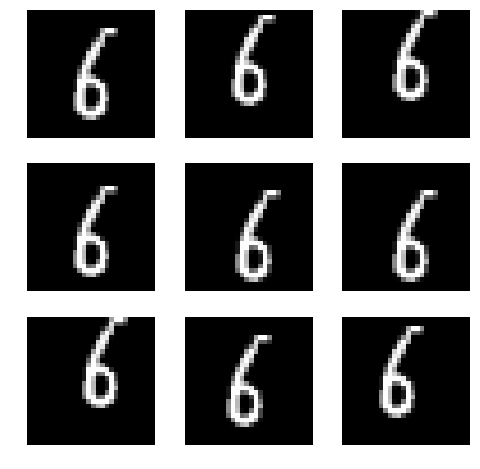

In [57]:
plot_multi(_plot, 3, 3, figsize=(8,8))

Assign a batch of data to `xb` and `yb`.

In [58]:
xb, yb = data.one_batch()

In [62]:
xb.shape, yb.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

Show the batch over three rows with a figsize of (5,5).

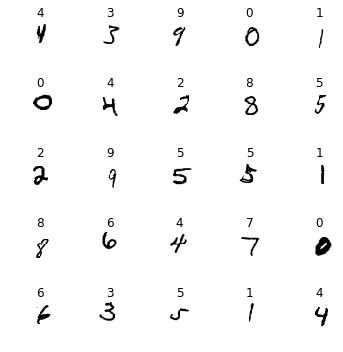

In [63]:
data.show_batch(figsize=(5,5))

### Basic CNN with batchnorm

Define a function `conv` with arguments `ni` and `nf` that creates a `nn.Conv2d` filter with `ni` inputs, `nf` filters, a kernel size of 3, stride of 2, and padding of 1.

In [64]:
def conv(ni, nf):
    return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

create a `nn.Sequential` that takes a 28x28 and starts with `ni` and `nf` of 1 and 8 respectively and adds blocks of (conv, batchnorm2d, relu) until there are 10 filters of size (1,1), and then flatten that.

In [65]:
model = nn.Sequential(
    conv(1, 8), # 14
    batchnorm_2d(8),
    relu(),
    conv(8, 16), # 7
    batchnorm_2d(16),
    relu(),
    conv(16, 32), # 4
    batchnorm_2d(32),
    relu(),
    conv(32, 16), # 2
    batchnorm_2d(16),
    relu(),
    conv(16, 10), # 1
    batchnorm_2d(10),
    Flatten()
)

Instantiate a learner object that takes our data, model, a loss func of `nn.CrossEntropyLoss` and the `accuracy` metric.

In [72]:
learn = Learner(data, model, loss_func=nn.CrossEntropyLoss(), metrics=[accuracy])

Print a summary of your model and look it over.

In [73]:
learn.summary

<bound method model_summary of Learner(data=ImageDataBunch;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
6,6,6,6,6
Path: /home/paperspace/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
6,6,6,6,6
Path: /home/paperspace/.fastai/data/mnist_png;

Test: None, model=Sequential(
  (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_s

Put `xb` on the GPU.

In [74]:
xb = xb.cuda()

Do `model(xb).shape`.

In [75]:
model(xb).shape

torch.Size([128, 10])

Find an lr (end_lr=100; what does this do?)

In [76]:
learn.lr_find(end_lr=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


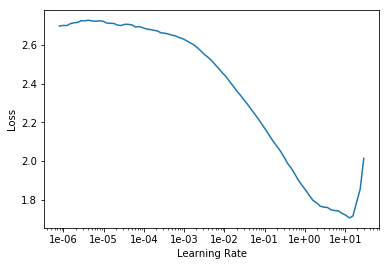

In [77]:
learn.recorder.plot()

Plot the learning rates. You shoudl land somewhere around 1e-2.

In [78]:
lr=1e-2

Fit a cycle with 3 epochs and a max_lr of 0.1.

In [79]:
learn.fit_one_cycle(3, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.234599,0.121035,0.967400,00:08
1,0.116796,0.062715,0.981600,00:06
2,0.074618,0.040791,0.988200,00:05


### Refactor

Take a look at the documentation for `conv_layer`.

In [80]:
doc(conv_layer)

Define a new function `conv2` that takes in `ni`, the number of inputs, and `nf`, the number of filters, and creates a new conv layer with `stride=2`.

In [81]:
def conv2(ni, nf):
    return conv_layer(ni, nf, stride=2)

Rewrite the model above in terms of `conv2`. For each layer, add a comment with the length/width of the square image.

In [83]:
model2 = nn.Sequential(
    conv2(1, 8),
    conv2(8, 16),
    conv2(16, 32),
    conv2(32, 16),
    conv2(16, 10),
    Flatten()
)

Create a learner (named `learn`) from the new model, same specs as above.

In [84]:
learn = Learner(data, model2, loss_func=nn.CrossEntropyLoss(), metrics=[accuracy])

Show `learn.summary`.

In [85]:
learn.summary

<bound method model_summary of Learner(data=ImageDataBunch;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
6,6,6,6,6
Path: /home/paperspace/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
6,6,6,6,6
Path: /home/paperspace/.fastai/data/mnist_png;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): ReLU(inplace)
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (2): Sequential(
    (0): Conv2d(16, 32, kernel_siz

Fit a cycle with 10 epochs, max_lr=0.1

In [86]:
learn.fit_one_cycle(10, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.246121,0.151525,0.953600,00:05
1,0.181524,0.116683,0.963000,00:05
2,0.160140,0.331171,0.887000,00:05
3,0.143822,0.096594,0.967500,00:05
4,0.125952,0.088977,0.973300,00:05
5,0.100605,0.064122,0.978500,00:05
6,0.079108,0.053768,0.982900,00:05
7,0.061232,0.034143,0.989100,00:05
8,0.056833,0.029087,0.991000,00:05
9,0.046762,0.026719,0.991400,00:05


### Resnet-ish

Get help with `res_block`.

In [87]:
help(res_block)

Help on function res_block in module fastai.layers:

res_block(nf, dense:bool=False, norm_type:Union[fastai.layers.NormType, NoneType]=<NormType.Batch: 1>, bottle:bool=False, **conv_kwargs)
    Resnet block of `nf` features. `conv_kwargs` are passed to `conv_layer`.



Show the documentation for `res_block`.

In [88]:
doc(res_block)

Create a model that alternates a conv2 with a res_block until you get down to a vector of outputs.

In [89]:
model3 = nn.Sequential(
    conv2(1, 8),
    res_block(8),
    conv2(8, 16),
    res_block(16),
    conv2(16, 32),
    res_block(32),
    conv2(32, 16),
    res_block(16),
    conv2(16, 10),
    res_block(10),
    Flatten()
)

Show the documentation for `res_block`.

In [91]:
doc(res_block)

In [92]:
learn = Learner(data, model3, loss_func=nn.CrossEntropyLoss(), metrics=[accuracy])

In [94]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


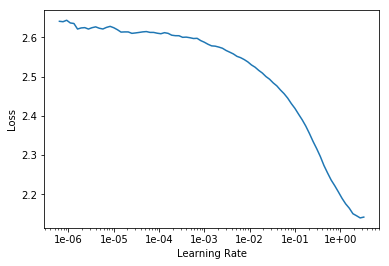

In [95]:
learn.recorder.plot()

In [96]:
learn.fit_one_cycle(10, max_lr=1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.199946,0.298151,0.908200,00:09
1,0.128632,0.956787,0.756000,00:09
2,0.106688,0.075217,0.977000,00:09
3,0.103033,0.089184,0.972100,00:09
4,0.074634,0.128349,0.958500,00:09
5,0.067834,0.038476,0.989200,00:09
6,0.052817,0.039413,0.987400,00:08
7,0.033442,0.023707,0.992300,00:09
8,0.026389,0.015161,0.995800,00:09
9,0.024742,0.013545,0.996000,00:09


Create a function `conv_and_res` that takes `ni` and `nf` and returns a sequential model with a `conv2` with ni, nf and a res_block with `nf`.

In [97]:
def conv_and_res(ni, nf):
    return nn.Sequential(conv2(ni, nf), res_block(nf))

Rewrite the model in terms of `conv_and_res` and `conv2`.

In [98]:
model4 = nn.Sequential(
    conv_and_res(1, 8),
    conv_and_res(8, 16),
    conv_and_res(16, 32),
    conv_and_res(32, 16),
    conv_and_res(16, 10),
    Flatten()
)

Create a `learn`er.

In [99]:
learn = Learner(data, model4, loss_func=nn.CrossEntropyLoss(), metrics=[accuracy])

Show a summary of the learner.

In [100]:
learn.summary

<bound method model_summary of Learner(data=ImageDataBunch;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
6,6,6,6,6
Path: /home/paperspace/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
6,6,6,6,6
Path: /home/paperspace/.fastai/data/mnist_png;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): ReLU(inplace)
      (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): SequentialEx(
      (layers): ModuleList(
        (0): Sequential(
          (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): ReLU(inplace)
          (2): BatchNorm2d(8, eps=1e-05, momentum

Find the learning rate (Hint: `end_lr=100`)

In [101]:
learn.lr_find(end_lr=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


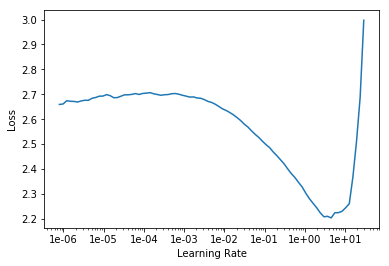

In [102]:
learn.recorder.plot()

Fit a 12-epoch cycle with max_lr=0.05 (or whatever you just found for learning rate)

In [103]:
learn.fit_one_cycle(12, max_lr=1e-1/2)

epoch,train_loss,valid_loss,accuracy,time
0,0.248607,0.169710,0.951900,00:09
1,0.159782,0.776971,0.780800,00:09
2,0.119474,0.194946,0.937100,00:09
3,0.091011,0.099531,0.966400,00:09
4,0.080756,0.106521,0.967000,00:09
5,0.070817,0.115366,0.964400,00:09
6,0.059254,0.054466,0.983000,00:09
7,0.039786,0.039950,0.986300,00:09
8,0.033419,0.026275,0.991300,00:09
9,0.030660,0.017816,0.994600,00:09


Show the learner summary one more time.

In [104]:
learn.summarymary

<bound method model_summary of Learner(data=ImageDataBunch;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
6,6,6,6,6
Path: /home/paperspace/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
6,6,6,6,6
Path: /home/paperspace/.fastai/data/mnist_png;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): ReLU(inplace)
      (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): SequentialEx(
      (layers): ModuleList(
        (0): Sequential(
          (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): ReLU(inplace)
          (2): BatchNorm2d(8, eps=1e-05, momentum

## fin